# q

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

In [85]:
# read municipio
name = 'campinas'
year = 2018

data = pd.read_csv('datasets/despesas/'+ str(year) +'/despesas-' + name + '-'+str(year)+'.csv', sep = ';',  encoding = "ISO-8859-1")
data.vl_despesa = data.vl_despesa.apply(lambda x : float('.'.join(x.split(','))))

In [86]:
data.columns

Index(['id_despesa_detalhe', 'ano_exercicio', 'ds_municipio', 'ds_orgao',
       'mes_referencia', 'mes_ref_extenso', 'tp_despesa', 'nr_empenho',
       'identificador_despesa', 'ds_despesa', 'dt_emissao_despesa',
       'vl_despesa', 'ds_funcao_governo', 'ds_subfuncao_governo',
       'cd_programa', 'ds_programa', 'cd_acao', 'ds_acao', 'ds_fonte_recurso',
       'ds_cd_aplicacao_fixo', 'ds_modalidade_lic', 'ds_elemento',
       'historico_despesa'],
      dtype='object')

In [87]:
list(data['ds_elemento'].unique())

['33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA',
 '33903958 - SERVIÇOS DE TELECOMUNICAÇÕES',
 '33903024 - MATERIAL PARA MANUTENÇÃO DE BENS IMÓVEIS',
 '33903912 - LOCAÇÃO DE MÁQUINAS E EQUIPAMENTOS',
 '33903916 - MANUTENÇÃO E CONSERVAÇÃO DE BENS IMÓVEIS',
 '33903995 - MANUTENÇÃO E CONSERVAÇÃO DE EQUIPAMENTOS DE  PROCESSAMENTO DE DADOS',
 '33903957 - SERVIÇOS DE PROCESSAMENTO DE DADOS',
 '33903607 - ESTAGIÁRIOS',
 '33903983 - SERVIÇOS DE CÓPIAS E REPRODUÇÃO DE DOCUMENTOS',
 '33903301 - PASSAGENS PARA O PAÍS',
 '33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS',
 '33903978 - LIMPEZA E CONSERVAÇÃO',
 '31901101 - VENCIMENTOS E SALÁRIOS',
 '33909399 - DIVERSAS INDENIZAÇÕES E RESTITUIÇÕES',
 '33903699 - OUTROS SERVIÇOS DE PESSOA FÍSICA',
 '31901399 - OUTRAS OBRIGAÇÕES PATRONAIS',
 '31911399 - OUTRAS OBRIGAÇÕES PATRONAIS - INTRA-ORÇAMENTÁRIO',
 '33903944 - SERVIÇOS DE ÁGUA E ESGOTO',
 '33900803 - AUXILIO FUNERAL INATIVO CIVIL',
 '44905210 - APARELHOS E EQUIPAMENTOS PARA ESPORTES E DIVER

In [88]:
import unidecode

def normalizeSentence(sentence):
    
    temp = sentence.split(' ')
    new_sentence = []
    for word in temp:
        new_sentence.append(normalizeWord(word))
    new_sentence = ' '.join(new_sentence)
    
    return new_sentence

def normalizeWord(word):
    
    # lower case word
    word = word.lower()
    
    # remove accents
    word = unidecode.unidecode(word)
    
    return word

def joinSeparetedWord(word):
    
    # removing aspas
    word = word.split('\'')
    word = ''.join(word)
    
    # separete words from word
    word = word.split()
    
    # join separeted words by '-'
    word = '-'.join(word)
    
    return word

In [89]:
def selectByWord(word, sentences):
    # select subset of sentences that contains word
    # return indexs of sentences
    
    # normalize word
    normalized_word = normalizeWord(word)
    
    indexs = []
    
    for i, sentence in enumerate(sentences):
        # normalize sentence
        normalized_sentence = normalizeSentence(sentence)
        
        if normalized_word in normalized_sentence:
            #print(i, normalized_sentence)
            indexs.append(i)
    return indexs

In [90]:
def plotPie(data, by, hue = 'ds_progama' ,n = 10, ax = None):
    
    # select rows
    size_otheres = len(data) - n
    if size_otheres < 0:
        print('Erro: n > limite')
        return
    aux = data.sort_values(by = by)

    selected = aux.tail(n)
    others = aux.head(size_otheres)
    if len(others) != 0:
        temp = pd.DataFrame({hue: 'OUTROS',
                             'vl_despesa': [others['vl_despesa'].sum()],
                             '%_despesa': [others['%_despesa'].sum()]}).set_index(hue)

        todos = pd.concat([selected, temp], axis = 0)
    else:
        todos = selected
    todos = todos.sort_values(by = by)


    if ax is None:
        plt.figure(figsize = (15, 8))
        todos[by].plot(kind = 'pie', colormap = 'viridis')
    else:
        todos[by].plot(kind = 'pie', colormap = 'viridis', ax = ax)
    
    if len(others) != 0:
        del temp, aux
    else:
        del aux

In [96]:
word = 'servi'
sentences = np.array(data['ds_elemento'].unique())

# find sentences
idxs = selectByWord(word, sentences)
obj_sentences = sentences[idxs]

servicos = pd.DataFrame()
for sentence in obj_sentences:
    
    # select rows of exemplo
    temp = data[data['ds_elemento'] == sentence]
    
    # concatenate
    servicos = pd.concat([servicos, temp])
try:
    print(servicos['ds_elemento'].unique())
except:
    print(word + ': Not found')

['33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA'
 '33903958 - SERVIÇOS DE TELECOMUNICAÇÕES'
 '33903957 - SERVIÇOS DE PROCESSAMENTO DE DADOS'
 '33903983 - SERVIÇOS DE CÓPIAS E REPRODUÇÃO DE DOCUMENTOS'
 '33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS'
 '33903699 - OUTROS SERVIÇOS DE PESSOA FÍSICA'
 '33903944 - SERVIÇOS DE ÁGUA E ESGOTO'
 '33903200 - MATERIAL, BEM OU SERVIÇO PARA DISTRIBUIÇÃO GRATUITA'
 '33903943 - SERVIÇOS DE ENERGIA ELÉTRICA'
 '33903990 - SERVIÇOS DE PUBLICIDADE LEGAL'
 '33903947 - SERVIÇOS DE COMUNICAÇÃO EM GERAL'
 '33903963 - SERVIÇOS GRÁFICOS E EDITORIAIS'
 '33904718 - CONTRIBUIÇÕES PREVIDENCIÁRIAS - SERVIÇOS DE TERCEIROS'
 '33903981 - SERVIÇOS BANCÁRIOS'
 '33903950 - SERVIÇO MÉDICO-HOSPITALAR, ODONTOLÓGICO E LABORATORIAIS'
 '33503900 - OUTROS SERVIÇOS DE TERCEIROS -PESSOA JURÍDICA'
 '33913999 - OUTROS SERVIÇOS DE TERCEIROS -PESSOA JURÍDICA - INTRA-ORÇAMENTÁRIO'
 '33903599 - OUTROS SERVIÇOS DE CONSULTORIA'
 '33903959 - SERVIÇOS DE ÁUDIO, VÍDEO E FOTO'
 '3390

In [78]:
# select acoes
elementos = list(servicos['ds_elemento'].unique())
despesas = []

# calculo da despesa por programa
for elemento in elementos:
    temp = servicos[servicos['ds_elemento'] == elemento]['vl_despesa']
    despesas.append(temp.sum())

# dataframe
acao_despesas = pd.DataFrame({'ds_elemento': elementos})
acao_despesas['vl_despesa'] = despesas
acao_despesas = acao_despesas.set_index('ds_elemento')
acao_despesas['%_despesa'] = acao_despesas['vl_despesa'].apply(lambda x : x/acao_despesas['vl_despesa'].sum()*100)
acao_despesas.head()

,vl_despesa,%_despesa
ds_elemento,,
33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,776657.83,16.665511
33903981 - SERVIÇOS BANCÁRIOS,30393.34,0.652180
33903958 - SERVIÇOS DE TELECOMUNICAÇÕES,165695.95,3.555501
33903944 - SERVIÇOS DE ÁGUA E ESGOTO,117834.10,2.528482
31901137 - GRATIFICAÇÃO POR TEMPO DE SERVIÇO,231078.99,4.958489


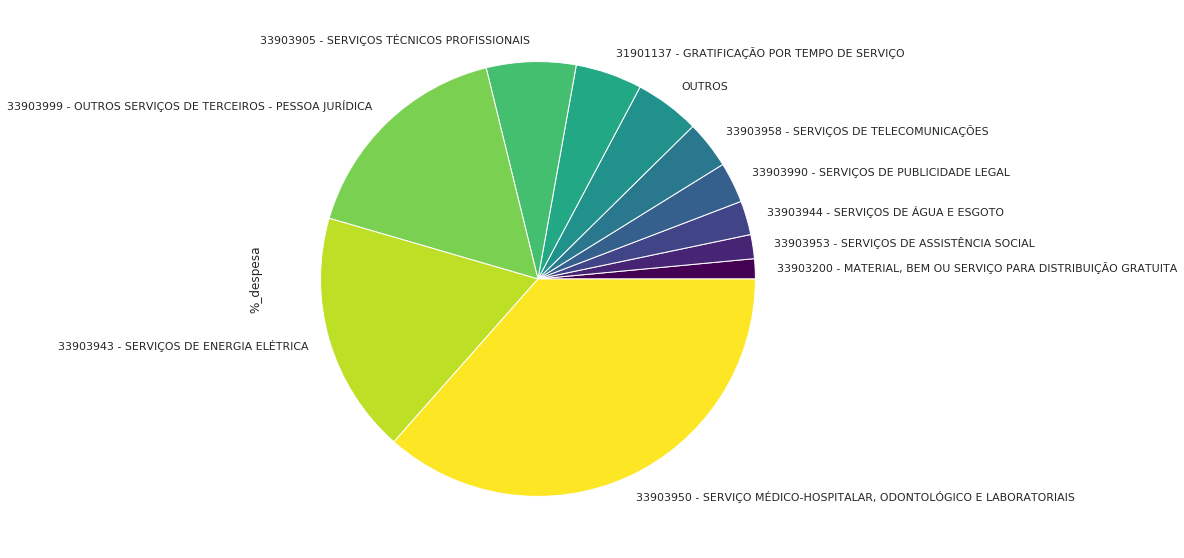

In [79]:
f, ax = plt.subplots(1,1, figsize=(10, 10))
plotPie(acao_despesas, '%_despesa', ax = ax, n = 10, hue = 'ds_acao')

In [80]:
# seleção dos meses de referencia
meses = np.array(servicos['mes_ref_extenso'].unique())
despesas = []
despesas_std = []
despesas_mean = []

# calculo da despesa por mes
for mes in meses:
    temp = servicos[servicos['mes_ref_extenso'] == mes]['vl_despesa']
    despesas.append(temp.sum())
    despesas_std.append(temp.std())
    despesas_mean.append(temp.mean())
    
# dataframe
mes_despesas = pd.DataFrame({'mes': meses})
mes_despesas['vl_despesa'] = despesas
mes_despesas['std_despesa'] = despesas_std
mes_despesas['mean_despesa'] = despesas_mean

mes_despesas = mes_despesas.set_index('mes')
mes_despesas['%_despesa'] = mes_despesas['vl_despesa'].apply(lambda x : x/mes_despesas['vl_despesa'].sum()*100)
mes_despesas

,vl_despesa,std_despesa,mean_despesa,%_despesa
mes,,,,
Janeiro,387799.22,2581.518050,1563.706532,8.321389
Fevereiro,464817.01,10972.824459,1715.191919,9.974035
Março,324077.80,5915.516567,1291.146614,6.954056
Abril,677832.99,19761.686358,2005.423047,14.544929
Maio,358437.38,6367.533365,1215.041966,7.691343
Junho,317087.14,4038.583832,1016.304936,6.804050
Julho,343692.22,3724.662681,904.453211,7.374942
Agosto,416308.81,5000.878005,1203.204653,8.933147
Setembro,346365.68,4257.691436,1128.226971,7.432309


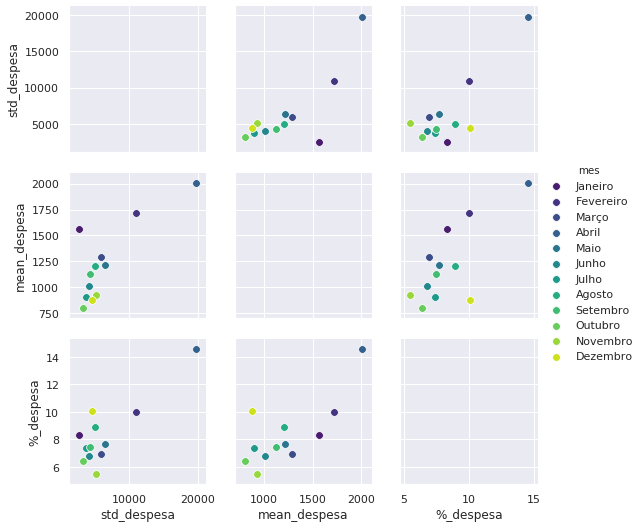

In [81]:
aux = mes_despesas.reset_index()

plot_kws = {'s': 60}
sns.pairplot(aux, hue = 'mes', palette = 'viridis', plot_kws = plot_kws,
             vars = ['std_despesa', 'mean_despesa', '%_despesa'])

nipoa:

 Despesas	R$			%
 SERVIÇOS:	4660270.26		8.61%
 TOTAL:		54118377.73		100.00%


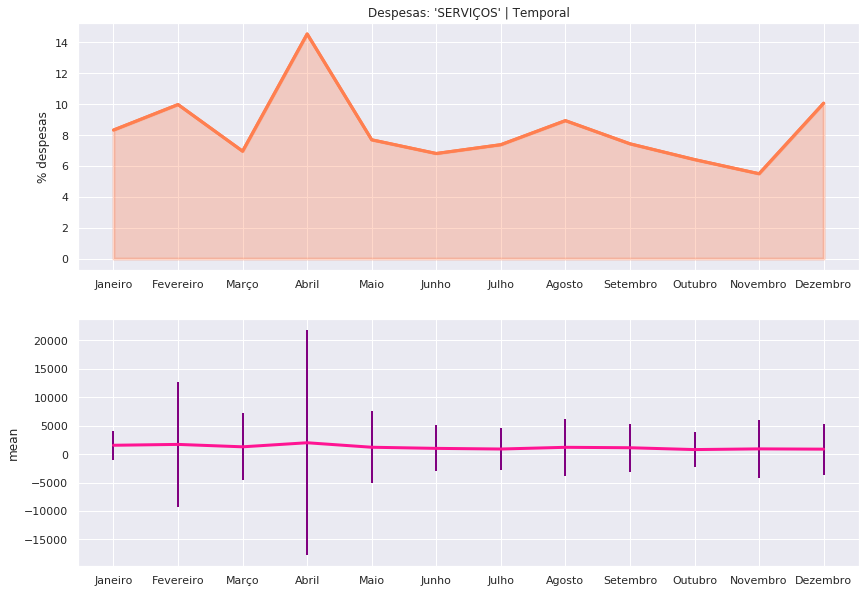

In [82]:
f, axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].set_title('Despesas: \'SERVIÇOS\' | Temporal')

axs[0].plot(mes_despesas['%_despesa'], lw = 3, color = 'coral')

aux = mes_despesas['%_despesa'].values
axs[0].plot(aux, lw = 3, color = 'coral')
x = np.arange(len(aux))
axs[0].fill_between(x, y1 = np.zeros(len(aux)), y2 = aux, lw = 3, color = 'coral', alpha = 0.3)

axs[0].set_ylabel('% despesas')

axs[1].errorbar(x = mes_despesas.index, y = mes_despesas['mean_despesa'].values,
                yerr = mes_despesas['std_despesa'].values, lw = 3, color = 'deeppink',
                elinewidth = 2, ecolor = 'purple')
axs[1].set_ylabel('mean')
print(name+':\n')
print(' Despesas\tR$\t\t\t%')
print(' SERVIÇOS:\t{0:1.2f}\t\t{1:2.2f}%'.format(mes_despesas['vl_despesa'].sum(), 100*mes_despesas['vl_despesa'].sum()/data['vl_despesa'].sum()))
print(' TOTAL:\t\t{0:1.2f}\t\t{1:2.2f}%'.format(data['vl_despesa'].sum(), 100))